<a href="https://colab.research.google.com/github/delonfadhil/MachineLearningTasks/blob/main/6thWeekTasks/6_K_Means_Clustering_Fadhil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Fadhil Dzikri Aqila

NIM : 1103213136

Lecture 6 : Clustering

Dataset : [Mall_Customers.csv](https://www.kaggle.com/datasets/shwetabh123/mall-customers)

Dokumentasi ChatGPT : [Link](https://chat.openai.com/share/f30cf6ba-8528-4dcc-929c-53abb6681306)

Prompt ChatGPT : beri kode untuk menghubungkan gcolab dengan gdrive

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Exploratory Data Analysis

Prompt ChatGPT : beri kode untuk membaca dataset as dataframe

In [30]:
import pandas as pd

# Ganti path dengan path dataset CSV di Google Drive Anda
path = '/content/drive/MyDrive/Dataset/Mall_Customers.csv'

# Membaca dataset CSV sebagai DataFrame
df = pd.read_csv(path)

# Menampilkan lima baris pertama dari DataFrame
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [32]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#Preprocessing

Prompt ChatGPT :

RangeIndex: 200 entries, 0 to 199

Data columns (total 5 columns):

Column Non-Null Count  Dtype

---  ------                  --------------  -----

 0   CustomerID              200 non-null    int64

 1   Genre                   200 non-null    object

 2   Age                     200 non-null    int64

 3   Annual Income (k$)      200 non-null    int64

 4   Spending Score (1-100)  200 non-null    int64


beri kode untuk drop fitur CustomerID

In [33]:
# Drop fitur CustomerID
df = df.drop('CustomerID', axis=1)

# Menampilkan lima baris pertama dari DataFrame setelah fitur CustomerID dihapus
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None


Prompt ChatGPT : beri kode untuk mengubah fitur Genre menjadi Gender

In [34]:
# Mengubah nama fitur Genre menjadi Gender
df = df.rename(columns={'Genre': 'Gender'})

# Menampilkan lima baris pertama dari DataFrame setelah fitur Genre diubah menjadi Gender
print(df.head())

df

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


#Modeling

Prompt ChatGPT : beri kode untuk memilih jumlah cluster terbaik menggunakan elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

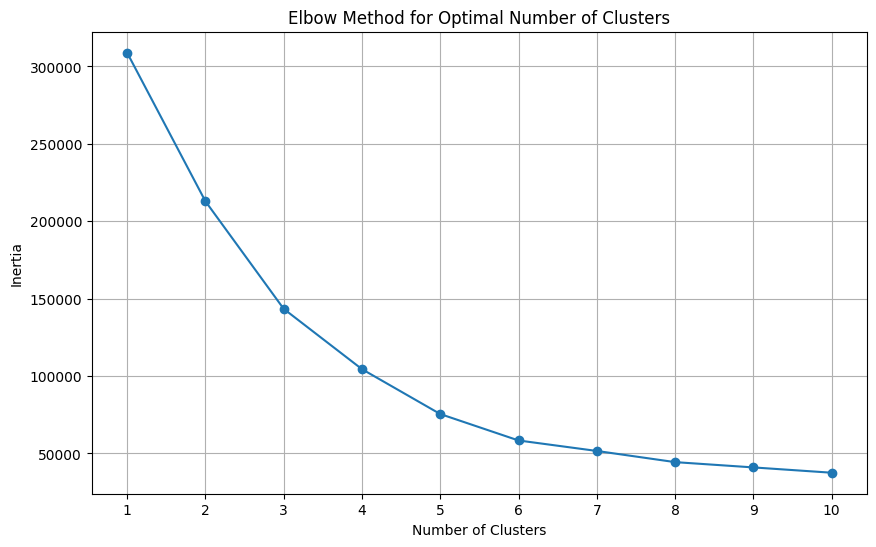

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Inisialisasi daftar inertia untuk setiap jumlah cluster
inertia = []

# Menentukan jumlah cluster yang akan diuji
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Prompt ChatGPT : beri kode beri kode untuk membuat klaster sebanyak 5-clusters

In [36]:
# Jumlah cluster
n_clusters = 6

# Menginisialisasi model KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Melakukan clustering
clusters = kmeans.fit_predict(X)

# Menambahkan kolom Cluster ke DataFrame
df['Cluster'] = clusters

# Menampilkan hasil cluster
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,5
1,Male,21,15,81,2
2,Female,20,16,6,5
3,Female,23,16,77,2
4,Female,31,17,40,5
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,3
197,Male,32,126,74,0
198,Male,32,137,18,3


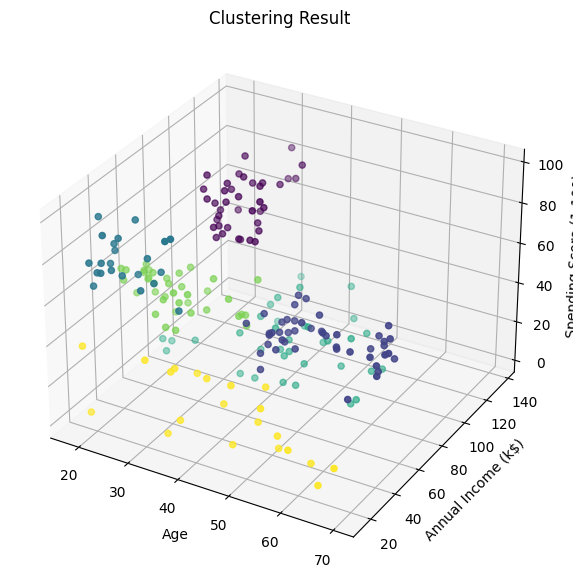

In [37]:
# Visualisasi hasil clustering
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=clusters, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('Clustering Result')
plt.show()

Prompt ChatGPT : beri kode untuk melakukan visualisasi hasil klasterisasi dengan sumbu x adalah Annual Income (k$) dan sumbu y-nya adalah Spending Score (1-100)

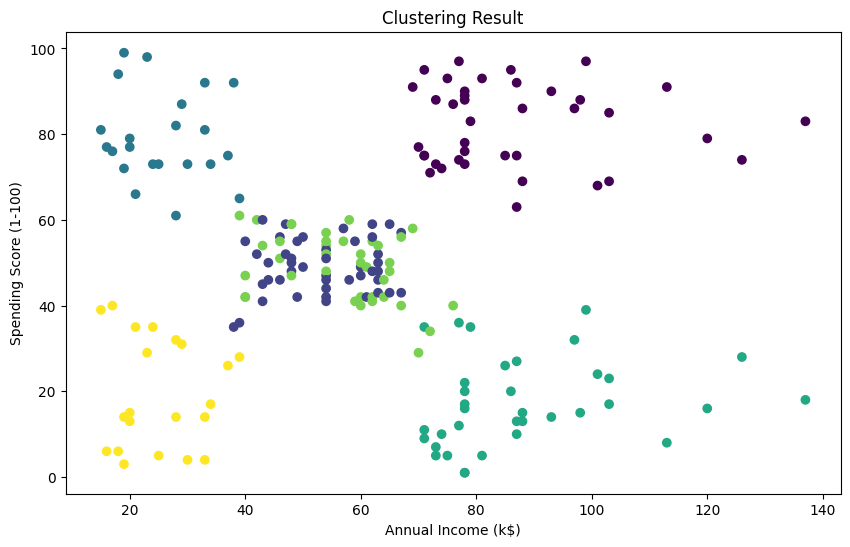

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=clusters, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering Result')
plt.show()

#Evaluating

Prompt ChatGPT : beri kode untuk melakukan evaluasi k-means

In [39]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, clusters)
print("Silhouette Score:", silhouette_avg)

# Menghitung Inertia
inertia_score = kmeans.inertia_
print("Inertia Score:", inertia_score)

Silhouette Score: 0.45205475380756527
Inertia Score: 58348.641363315044
